In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [4]:
df = pd.read_csv('tDCS_study_data.csv')

In [6]:
# Q1 Was there blocking
tab1 = pd.crosstab(df['tDCS'], df['gender'])
tab1

gender,F,M
tDCS,,
0,6,6
1,6,6


In [14]:
# Q2 What is the SEM
df['MT_pre'].sem()

np.float64(0.1266558726331463)

In [18]:
# Q3
print(df['MT_pre'].mean() + df['MT_pre'].sem()*1.96)
print(df['MT_pre'].mean() - df['MT_pre'].sem()*1.96)


2.9650455103609663
2.468554489639033


In [ ]:
# Q4 How to get %80 confidence interval
quantiles = ss.norm.ppf[0,1]...
print(df['MT_pre'].mean() + df['MT_pre'].sem()*1.28)
print(df['MT_pre'].mean() - df['MT_pre'].sem()*1.28)

In [30]:
# Q6
def p_diff_func(data):
    return data[data['tDCS'] == 0]['MT_post'].median() - data[data['tDCS'] == 1]['MT_post'].median()

print(p_diff_func(df))


0.6096250000000001


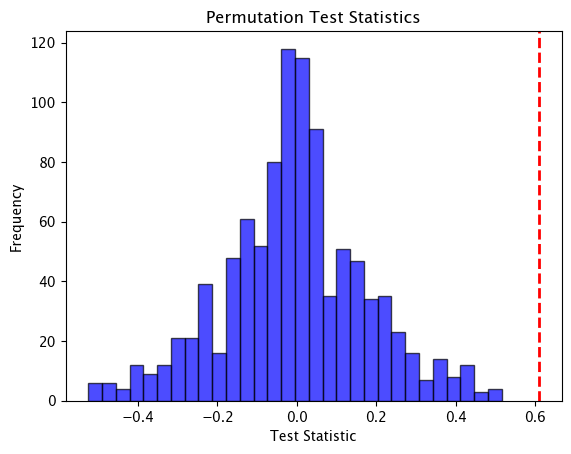

Empirical Test Statistic: 0.6096250000000001
P-value: 0.000000
None


In [38]:
# Q9
def shuffle_column(df, colname):
    """Shuffle a specific column in the DataFrame."""
    shuffled_df = df.copy()
    shuffled_df[colname] = np.random.permutation(shuffled_df[colname])
    return shuffled_df

# Write the function for the permutation test
def permutation_test(df, numIter=1000):
    """Perform a permutation test to evaluate the significance of the difference in probabilities."""
    empirical_stat = p_diff_func(df)

    test_stats = []

    for _ in range(numIter):
        shuffled_df = shuffle_column(df, 'tDCS')
        test_stat = p_diff_func(shuffled_df)
        test_stats.append(test_stat)

    test_stats = np.array(test_stats)

    plt.hist(test_stats, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(empirical_stat, color='red', linestyle='dashed', linewidth=2)
    plt.title('Permutation Test Statistics')
    plt.xlabel('Test Statistic')
    plt.ylabel('Frequency')
    plt.show()

    p_value = np.mean(test_stats >= empirical_stat)
    print(f'Empirical Test Statistic: {empirical_stat}')
    print("P-value: {:.6f}".format(p_value))  # Change 6 to the desired number of decimal places

print(permutation_test(df))